## Подготовка данных для модели машинного обучения



В данном ноутбуке будет производится разведочный анализ данных предлагаемого датасета, а также будет проводиться подготовка к формированию итогового датасета, который будет использоваться для итоговых моделей.

В данном разделе будут проведены следующие действия:
- поиск и заполнение отсутствующих данных. 
- устранение нетипичных значений - выбросов. 
- устранение дубликатов и т.д. 

### Этап 1. Загрузка стандартных библиотек и загрузка датасета

In [234]:
## Импорт стандартных библиотек
import pandas as pd
import numpy as np

## Импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

## Прочие библиотеки
import warnings

Загрузка данных происходит из директории Data/Raw, где содержатся необработанные данные. Также после загрузки необходимо проверить общую струуктуру данных - сколько строк и столбцовв есть в датасете, проверить типы столбцов - необходимо проверить, являются ли они числовыми. 

Если столбцы числовыми не являются, то в одном случае можно применить энкодеры для кодировки текста в значения, в другом случае - просто поменять тип столбца на числовой. 

In [235]:
# Загрузка данных
df = pd.read_csv("Data/Raw/data.csv")
df = pd.DataFrame(df)
print(df.shape)
print(df.dtypes)

(11934, 18)
Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока          object
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                      object
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object


Датасет имеет порядка 12 тыс. строк и 18 столбцов. При этом два столбца - 'Температура выдоха Истока' и 'Древний Ветер' не являются числовыми столбцами. 

- Температура выдоха Истока - температура воздуха, исходящего из магического ускорителя портала, в градусах Цельсия.
- Древний Ветер - давление древней магической энергии, покидающей портал в виде выхлопного потока.

Нужно их рассмотреть подробнее.

In [236]:
df["Температура выдоха Истока"]

0        Исток не вернул выдох
1                      581.658
2        Исток не вернул выдох
3        Исток не вернул выдох
4                      645.642
                 ...          
11929                   628.95
11930    Исток не вернул выдох
11931                  680.393
11932    Исток не вернул выдох
11933    Исток не вернул выдох
Name: Температура выдоха Истока, Length: 11934, dtype: object

In [237]:
counts = df["Температура выдоха Истока"].value_counts()
counts

Температура выдоха Истока
Исток не вернул выдох    9547
635.572                     2
606.098                     2
565.712                     2
600.093                     2
                         ... 
691.172                     1
564.919                     1
637.581                     1
779.856                     1
680.393                     1
Name: count, Length: 2369, dtype: int64

In [238]:
df["Древний Ветер"].head(100)

0     Древний Ветер развеялся
1                       1.019
2     Древний Ветер развеялся
3     Древний Ветер развеялся
4                       1.026
               ...           
95    Древний Ветер развеялся
96    Древний Ветер развеялся
97    Древний Ветер развеялся
98                      1.049
99    Древний Ветер развеялся
Name: Древний Ветер, Length: 100, dtype: object

In [239]:
counts1 = df["Древний Ветер"].value_counts()
counts1

Древний Ветер
Древний Ветер развеялся    9547
1.019                       371
1.02                        348
1.026                       209
1.03                        192
1.023                       170
1.036                       145
1.042                       128
1.041                       124
1.035                       122
1.022                       109
1.031                        96
1.051                        81
1.05                         72
1.027                        72
1.049                        65
1.021                        44
1.052                        35
1.043                         3
1.04                          1
Name: count, dtype: int64

Данные столбцы имеют в себе несколько текстовых значений - "Исток не вернул выдох" и "Древний Ветер развеялся". При этом текстовых значений достаточно большое количество относительно общего датасета - 9547. В данном случае мы не можем убрать такие строки из датасета, в силу его небольшого объема. 

При заполнении медианными или средними значениями мы получим очень сильный перекос в данных, так как текстовых значений слишком много. Поэтому предлагается заполнить текстовые значения нулевыми значениями. 

Дополнительно также стоит отметить, что значения под своими наименованиями предполагают, что данные для этимх показателей при работе портала не были получены. В таком случае действительно целесообразнее заменить эти значения нулями на данном этапе. 

In [240]:
df['Древний Ветер'] = df['Древний Ветер'].str.replace("Древний Ветер развеялся", "0", case=False, regex=False)
df['Температура выдоха Истока'] = df['Температура выдоха Истока'].str.replace("Исток не вернул выдох", "0", case=False, regex=False)
df = df.astype({'Температура выдоха Истока': 'float64'})
df = df.astype({'Древний Ветер': 'float64'})
print(df.dtypes)

Вектор Мощи                       float64
Скорость перехода через портал    float64
Приток Силы Потока                float64
Ритм магического ядра             float64
Поток Энергий                     float64
Сила Левого Потока                float64
Сила Правого Потока               float64
Пламя Стихий                      float64
Температура вдоха Истока            int64
Температура выдоха Истока         float64
Приток давления Выдоха Истока     float64
Давление вдоха Истока             float64
Давление выдоха Истока            float64
Древний Ветер                     float64
Печать Чародея                    float64
Эмульсия Истока                   float64
Дыхание Истока                    float64
Гармония Бессмертия               float64
dtype: object


Дополнительно проверим данные на наличие пропусков в значениях.

In [241]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Вектор Мощи - 0%
Скорость перехода через портал - 0%
Приток Силы Потока - 0%
Ритм магического ядра - 0%
Поток Энергий - 0%
Сила Левого Потока - 0%
Сила Правого Потока - 0%
Пламя Стихий - 0%
Температура вдоха Истока - 0%
Температура выдоха Истока - 0%
Приток давления Выдоха Истока - 0%
Давление вдоха Истока - 0%
Давление выдоха Истока - 0%
Древний Ветер - 0%
Печать Чародея - 0%
Эмульсия Истока - 0%
Дыхание Истока - 0%
Гармония Бессмертия - 0%


В данном случае пропусков в данных не наблюдается. Можно переходить к этапу анализа выбросов.

### Этап 2. Анализ и корректировка выбросов 

В рамках анализа выбросов будут построены диаграммы Boxplot для анализа распределений числовых признаков. Данные, в которых наблюдаются выбросы или которые имеют нерелеватные (дубли, единственные значения и т.д.) значения будут корректироваться или удалятся. 

Сначала найдем в датасете информацию о том, какие стобцы имеют единственные значения, и которыми можно пренебречь (они на результат работы модели влиять не будут).

In [242]:
print(df.nunique())

Вектор Мощи                           9
Скорость перехода через портал        9
Приток Силы Потока                11430
Ритм магического ядра              3888
Поток Энергий                     11834
Сила Левого Потока                 4286
Сила Правого Потока                4286
Пламя Стихий                      11772
Температура вдоха Истока              1
Температура выдоха Истока          2369
Приток давления Выдоха Истока       524
Давление вдоха Истока                 1
Давление выдоха Истока             4209
Древний Ветер                        20
Печать Чародея                     8496
Эмульсия Истока                     696
Дыхание Истока                       51
Гармония Бессмертия                  26
dtype: int64


Предварительный анализ показал, что в датасете есть два столбца, которые имеют единственнное значение. Их можно из датасета убрать как неинформативные.

In [243]:
df = df[[c for c
        in list(df)
        if len(df[c].unique()) > 1]]

Далее проверим датасет на наличие дубликатов строк и избавимся от них. 

In [244]:
df.drop_duplicates(inplace=True)
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,0.000,1.096,5.947,0.000,7.137,0.082,0.95,0.975
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,0.000,1.389,7.574,0.000,13.086,0.259,0.95,0.975
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,0.000,1.658,9.007,0.000,18.109,0.358,0.95,0.975
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,0.000,2.512,13.109,0.000,32.671,0.647,1.00,1.000
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,0.000,3.594,18.293,0.000,58.064,1.149,1.00,1.000


Как видно из таблицы выше, количество строк не изменилось, что говорит о том, что дубликатов в нашем датасете нет.

Следующим шагом будет поиск и удаление выбросов в датасете, если такие присутствуют. Для этого будем использовать метод, основанный на стандартизированной оценке (z-оценка, z-score). Эта оценка показывает на сколько средних квадратических отклонений значение отличается от среднего.

Посмотрим ниже, наскольно данные в датасете отличаются от среднего. Известно, что 99,7% наблюдений будут лежать в пределах трех среднеквадратических отклонений. Для нахождения этого показателя, посмотрим, насколько каждое из наблюдений отличается  от среднего значения. И выведем строки, в которых хотябы одно из наблюдений находится за рамками 3 СКО.

In [245]:
from scipy import stats
 
z = stats.zscore(df)
df[(np.abs(z) > 3).any(axis = 1)].head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия


Таким образом, метод, представленный выше, показал, что в нашем датасете по результатам предобработки данных нет существенных выбросов. 

### Этап 3. Корреляционный анализ

Далее стоит рассмотреть данные на наличие мультиколлинеарности - наличии линейной зависимости между факторами модели, что в конечном итоге будет сказываться на ее качестве.

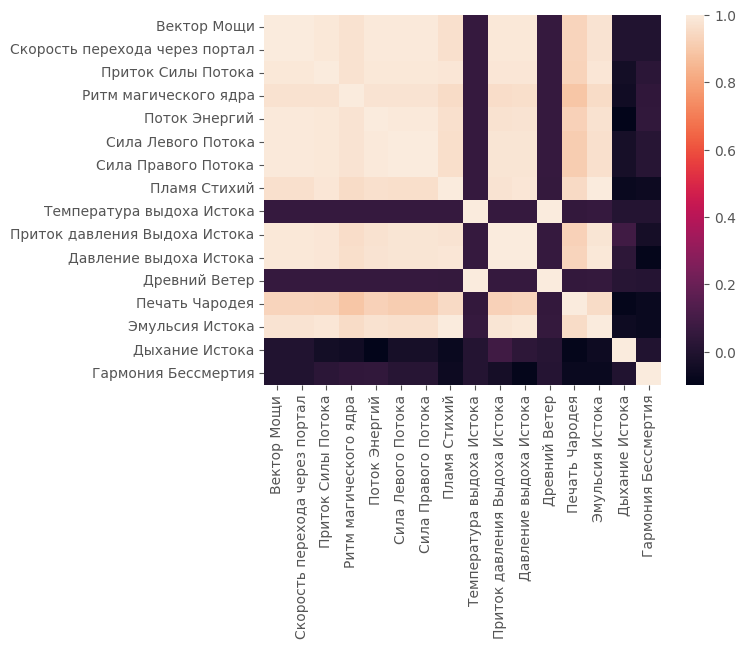

In [246]:
sns.heatmap(df.corr(method='spearman'));

Корреляционная матрица выше показывает, что между большинством факторов есть крайне высокая мультиколлинеарности, что в итоге повлечет  за собой проблемы в будущих моделях. В таком случае целесообразнее использовать дополнительную информацию по созданию новых расчетных полей и оценить из влияние друг на друга. 

- Для определения общей мощности потоков сначала сложите значения "Силы Левого Потока" и "Силы Правого Потока", чтобы получить представление о совокупной мощности.
- Для более полной картины суммарной силы всех потоков дополнительно объедините "Силу Левого Потока", "Силу Правого Потока" и "Приток Силы Потока".
- Общую силу ядра можно оценить, умножив "Ритм магического ядра" на "Приток Силы Потока", что даст показатель общей мощности ядра. 
- Общее давление на выходе можно рассчитать, сложив значения "Притока давления Выдоха Истока" и
"Давления выдоха Истока".
- Магическую производительность определяет отношение "Скорости перехода через портал" к "Эмульсии Истока" - это покажет, насколько эффективно топливо поддерживает скорость перехода. 
- Эффективность самого ядра можно вычислить, разделив его общую силу на "Эмульсию Истока".
- Для расчёта магической мощности потребуется учесть "Эмульсию Истока", общее давление и разницу между "Пламенем Стихий" и "Температурой вдоха Истока".
- Оценить степень износа магических источников поможет отношение "Дыхания Истока" к "Гармонии Бессмертия".
- Абсолютное значение разницы между "Дыханием Истока" и "Гармонией Бессмертия" отразит расхождения в стабильности магии, а баланс угасания можно определить, разделив разницу между "Дыханием Истока" и "Гармонией Бессмертия" на "Скорость перехода через портал".

Для этого создадим новые столбцы на основе данных датасета и создадим еще один датасет с расчетными показателями. 

In [ ]:
df_calc = pd.DataFrame(df['Гармония Бессмертия'])
df_calc['Суммарная сила потоков'] = df['Сила Левого Потока'] + df["Сила Правого Потока"] + df["Приток Силы Потока"]
df_calc['Сила ядра'] = df['Ритм магического ядра'] * df["Приток Силы Потока"]
df_calc['Общее давление'] = df['Приток давления Выдоха Истока'] + df["Давление выдоха Истока"]
df_calc['Магическая производительность'] = df['Скорость перехода через портал'] / df["Эмульсия Истока"]
df_calc['Эффективность ядра'] = df['Сила ядра'] / df["Эмульсия Истока"]
df_calc['Магическая мощность'] = df['Эмульсия Истока'] + df["Общее давление"] + (df['Пламя Стихий'])
df_calc['Степень износа'] = df['Дыхание Истока'] / df["Гармония Бессмертия"]
df_calc['Расхождения в стабильности магии'] = df['Дыхание Истока'] - df["Гармония Бессмертия"]
df_calc['Баланс угасания'] = (df['Дыхание Истока'] - df["Гармония Бессмертия"]) / df["Скорость перехода через портал"]

<Axes: >

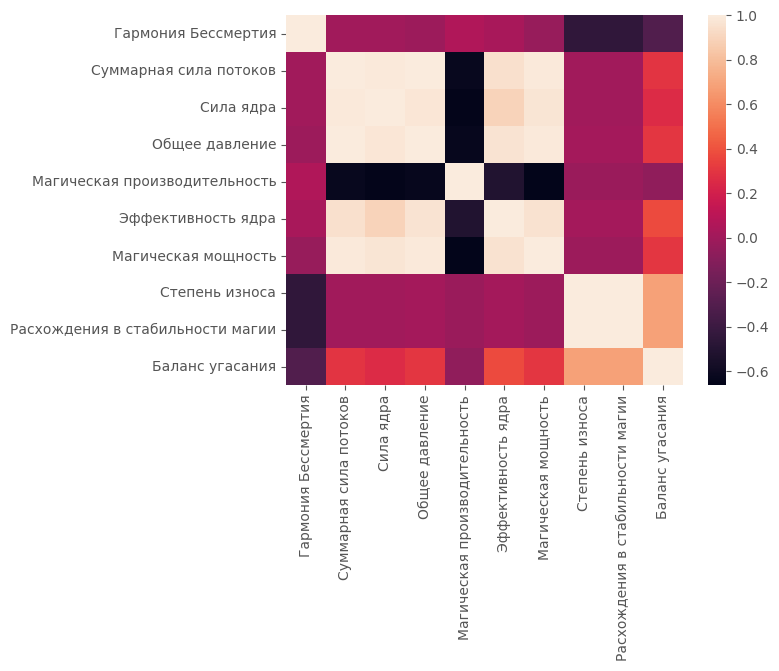

In [226]:
sns.heatmap(df1.corr(method='pearson'))

In [227]:
df2 = pd.DataFrame(df['Гармония Бессмертия'])
##df2['Суммарная сила потоков'] = df['Сила Левого Потока'] + df["Сила Правого Потока"] + df["Приток Силы Потока"]
##df2['Сила ядра'] = df['Ритм магического ядра'] * df["Приток Силы Потока"]
#df2['Общее давление'] = df['Приток давления Выдоха Истока'] + df["Давление выдоха Истока"]
df2['Магическая производительность'] = df['Скорость перехода через портал'] / df["Эмульсия Истока"]
df2['Эффективность ядра'] = df['Сила ядра'] / df["Эмульсия Истока"]
##df2['Магическая мощность'] = df['Эмульсия Истока'] + df["Общее давление"] + (df['Пламя Стихий'])
#df2['Степень износа'] = df['Дыхание Истока'] / df["Гармония Бессмертия"]
#df2['Расхождения в стабильности магии'] = df['Дыхание Истока'] - df["Гармония Бессмертия"]
df2['Баланс угасания'] = (df['Дыхание Истока'] - df["Гармония Бессмертия"]) / df["Скорость перехода через портал"]

In [228]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
df
x = df[['Вектор Мощи',
    'Скорость перехода через портал',
    'Приток Силы Потока',
    'Ритм магического ядра',
    'Поток Энергий',
    'Сила Левого Потока',
    'Сила Правого Потока',
    'Пламя Стихий',
    'Температура выдоха Истока',
    'Приток давления Выдоха Истока',
    'Давление выдоха Истока',
    'Древний Ветер',
    'Печать Чародея',
    'Эмульсия Истока',
    'Дыхание Истока']]
y = df['Гармония Бессмертия']   # dependent variables
X = sm.add_constant(x)
# fit the regression model
#reg = sm.OLS(y, X).fit()
# get Variance Inflation Factor (VIF) 
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

c:\Users\Andrew\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Вектор Мощи,2.480233e+04
1,Скорость перехода через портал,2.237722e+04
2,Приток Силы Потока,1.723135e+04
3,Ритм магического ядра,1.417217e+03
4,Поток Энергий,2.303489e+02
5,Сила Левого Потока,inf
6,Сила Правого Потока,inf
7,Пламя Стихий,3.122385e+03
8,Температура выдоха Истока,9.922479e+01
9,Приток давления Выдоха Истока,2.656226e+04


In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# добавление константы для перехвата
df2['CONSTANT'] = 1
x = df2
# расчет VIF для каждого предиктора
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
## print(VIFs)
## print(format(VIFs))
## print("{:.10f}".format(float(VIFs)))
VIFs.round()

c:\Users\Andrew\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,35937.0
1,Вектор Мощи,24802.0
2,Скорость перехода через портал,22377.0
3,Приток Силы Потока,17231.0
4,Ритм магического ядра,1417.0
5,Поток Энергий,230.0
6,Сила Левого Потока,inf
7,Сила Правого Потока,inf
8,Пламя Стихий,3122.0
9,Температура выдоха Истока,99.0


In [233]:
vvv = pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})
vvv.round()

c:\Users\Andrew\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Вектор Мощи,24802.0
1,Скорость перехода через портал,22377.0
2,Приток Силы Потока,17231.0
3,Ритм магического ядра,1417.0
4,Поток Энергий,230.0
5,Сила Левого Потока,inf
6,Сила Правого Потока,inf
7,Пламя Стихий,3122.0
8,Температура выдоха Истока,99.0
9,Приток давления Выдоха Истока,26562.0


In [180]:
x.corr()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока
Вектор Мощи,1.000000e+00,9.999152e-01,0.961025,0.962090,0.986017,0.959241,0.959241,0.961242,0.055313,0.963058,0.969113,0.007043,0.913631,0.931422,2.264405e-15
Скорость перехода через портал,9.999152e-01,1.000000e+00,0.958243,0.960412,0.986621,0.956371,0.956371,0.958841,0.055349,0.960613,0.966975,0.007146,0.910014,0.927815,1.028000e-15
Приток Силы Потока,9.610254e-01,9.582428e-01,1.000000,0.989723,0.932993,0.999177,0.999177,0.991130,0.050898,0.998900,0.997582,0.002458,0.977871,0.995082,2.978258e-03
Ритм магического ядра,9.620898e-01,9.604117e-01,0.989723,1.000000,0.943038,0.988625,0.988625,0.979638,0.051238,0.995103,0.996035,0.002726,0.962341,0.980223,1.369908e-03
Поток Энергий,9.860173e-01,9.866210e-01,0.932993,0.943038,1.000000,0.929593,0.929593,0.939762,0.057346,0.937460,0.945938,0.009789,0.879120,0.896959,-1.883800e-02
Сила Левого Потока,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.050528,0.998012,0.996172,0.002251,0.977468,0.994366,7.535000e-04
Сила Правого Потока,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.050528,0.998012,0.996172,0.002251,0.977468,0.994366,7.535000e-04
Пламя Стихий,9.612418e-01,9.588406e-01,0.991130,0.979638,0.939762,0.985962,0.985962,1.000000,0.051314,0.989383,0.990463,0.002667,0.969655,0.986318,-3.962512e-02
Температура выдоха Истока,5.531322e-02,5.534929e-02,0.050898,0.051238,0.057346,0.050528,0.050528,0.051314,1.000000,0.051029,0.051460,0.993733,0.046534,0.048011,9.997756e-03
Приток давления Выдоха Истока,9.630581e-01,9.606126e-01,0.998900,0.995103,0.937460,0.998012,0.998012,0.989383,0.051029,1.000000,0.999401,0.002491,0.975704,0.992728,8.167586e-03


In [59]:
# добавление константы для перехвата
X = add_constant(df.drop('Гармония Бессмертия', axis=1))

# расчет VIF для каждого предиктора
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
## print(VIFs)
## print(format(VIFs))
## print("{:.10f}".format(float(VIFs)))
VIFs.round()

c:\Users\Andrew\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,67806600.0
1,Вектор Мощи,61904.0
2,Скорость перехода через портал,46179.0
3,Приток Силы Потока,inf
4,Ритм магического ядра,5793.0
5,Поток Энергий,4602.0
6,Сила Левого Потока,inf
7,Сила Правого Потока,inf
8,Пламя Стихий,inf
9,Температура выдоха Истока,99.0


In [70]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.datasets import make_regression

x = df.drop('Гармония Бессмертия')
y = df['Гармония Бессмертия']
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
pls = PLSRegression(n_components=3)
pls.fit(X, y)

KeyError: "['Гармония Бессмертия'] not found in axis"

In [68]:
df1

,Баланс угасания
0,-0.016199
1,-0.008099
2,-0.005400
3,-0.004050
4,-0.003240
...,...
11929,0.000000
11930,0.000000
11931,0.000000
11932,0.000000


In [41]:
df1.corr()

,Гармония Бессмертия,Суммарная сила потоков,Сила ядра,Общее давление,Магическая производительность,Эффективность ядра,Магическая мощность,Степень износа,Расхождения в стабильности магии,Баланс угасания
Гармония Бессмертия,1.000000,0.000353,0.000169,-0.015672,0.060306,0.027653,-0.037608,-0.449414,-0.453990,-0.309589
Суммарная сила потоков,0.000353,1.000000,0.987258,0.997880,-0.629649,0.953768,0.991671,0.002446,0.002458,0.297294
Сила ядра,0.000169,0.987258,1.000000,0.979385,-0.653223,0.895532,0.969310,0.000933,0.000937,0.253959
Общее давление,-0.015672,0.997880,0.979385,1.000000,-0.633683,0.962860,0.991069,0.014444,0.014512,0.304681
Магическая производительность,0.060306,-0.629649,-0.653223,-0.633683,1.000000,-0.513831,-0.662810,-0.024263,-0.024893,-0.058966
Эффективность ядра,0.027653,0.953768,0.895532,0.962860,-0.513831,1.000000,0.957479,0.018442,0.018253,0.373851
Магическая мощность,-0.037608,0.991671,0.969310,0.991069,-0.662810,0.957479,1.000000,-0.016994,-0.016662,0.299387
Степень износа,-0.449414,0.002446,0.000933,0.014444,-0.024263,0.018442,-0.016994,1.000000,0.999959,0.681900
Расхождения в стабильности магии,-0.453990,0.002458,0.000937,0.014512,-0.024893,0.018253,-0.016662,0.999959,1.000000,0.681928
Баланс угасания,-0.309589,0.297294,0.253959,0.304681,-0.058966,0.373851,0.299387,0.681900,0.681928,1.000000


In [15]:
df

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура выдоха Истока,Приток давления Выдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Совокупная мощность
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,0.000,1.096,5.947,0.000,7.137,0.082,0.95,0.975,15.168
1,2.088,3.08664,6960.180,144.111767,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975,56.408
2,3.144,4.62996,8379.229,145.220853,7111.811,60.358,60.358,606.002,0.000,1.389,7.574,0.000,13.086,0.259,0.95,0.975,120.716
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,0.000,1.658,9.007,0.000,18.109,0.358,0.95,0.975,227.548
4,5.140,7.71660,21636.432,201.513586,8494.777,175.306,175.306,731.494,645.642,2.078,11.197,1.026,26.373,0.522,0.95,0.975,350.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,7.71660,21624.934,201.516623,8470.013,175.239,175.239,681.658,628.950,2.087,10.990,1.027,23.803,0.471,1.00,1.000,350.478
11930,6.175,9.25992,29763.213,241.561772,8800.352,245.954,245.954,747.405,0.000,2.512,13.109,0.000,32.671,0.647,1.00,1.000,491.908
11931,7.148,10.80324,39003.867,280.444950,9120.889,332.389,332.389,796.457,680.393,2.982,15.420,1.036,42.104,0.834,1.00,1.000,664.778
11932,8.206,12.34656,50992.579,323.315332,9300.274,438.024,438.024,892.945,0.000,3.594,18.293,0.000,58.064,1.149,1.00,1.000,876.048
